/home/rahuls/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:89: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


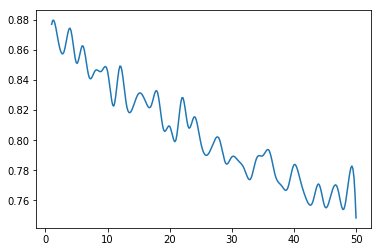

In [86]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
from scipy.interpolate import spline
import csv
import random
import math
import operator

def load_dataset(f_name,split, train_set=[], test_set=[]):
    with open(f_name, newline='') as csvfile:
        lines = csv.reader(csvfile, delimiter=',', quotechar='|')
        dataset = list(lines)
        for x in range(len(dataset)):
            for y in range(24):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                train_set.append(dataset[x])
            else:
                test_set.append(dataset[x])

def distance(inst1,inst2, length):
    dist = 0
    for x in range(length):
        dist += pow((inst1[x]-inst2[x]),2)
    return math.sqrt(dist)
        


def neighbors(train_set,test_instance, k):
    distances = []
    length = len(test_instance)-1
    for x in range(len(train_set)):
        dist=distance(test_instance, train_set[x],length)
        distances.append((train_set[x],dist))
    distances.sort(key=operator.itemgetter(1))
    neigh = []
    for x in range(int(k)):
        neigh.append(distances[x][0])
    return neigh


def getResp(neighbors):
    class_votes = {}    
    for x in range(len(neighbors)):
        resp = neighbors[x][-1]
        if resp in class_votes:
            class_votes[resp] += 1
        else:
            class_votes[resp] = 1
    sorted_votes = sorted(class_votes.items(), key=operator.itemgetter(1),reverse= True)
    return sorted_votes[0][0]                

def acc(test_set, pred):
    c = 0
    for x in range(len(test_set)):
        if test_set[x][-1] == pred[x]:
            c += 1
    return(c/float(len(test_set)))



def knn(k):
    predictions=[]
    train_set=[]
    test_set=[]
    split=0.67
    load_dataset('sensor_readings_24.csv',split,train_set,test_set)
    for x in range(len(test_set)):
        n = neighbors(train_set,test_set[x],k)
        r = getResp(n)
        predictions.append(r)
    a = acc(test_set, predictions)
    return a

x=[]
y=[]
for i in range(1,51):
    x.append(i)
    y.append(knn(i))

m = np.array(x)
n = np.array(y)

x_smooth = np.linspace(m.min(),m.max(),300).reshape(-1,1)
y_smooth = spline(m,n,x_smooth)
plt.plot(x_smooth,y_smooth)



In [87]:
bo = BayesianOptimization(knn,{'k':(1,50)})
bo.maximize(init_points=2, n_iter=0, acq='ei')

Initialization
-----------------------------------------
 Step |   Time |      Value |         k | 
    1 | 00m55s |    0.78063 |   27.5163 | 
    2 | 00m57s |    0.82391 |   22.7383 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 


In [88]:
def posterior(bo, x, xmin=1, xmax=10):
    xmin, xmax = 1, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((1, 50))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((1, 50))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    
    


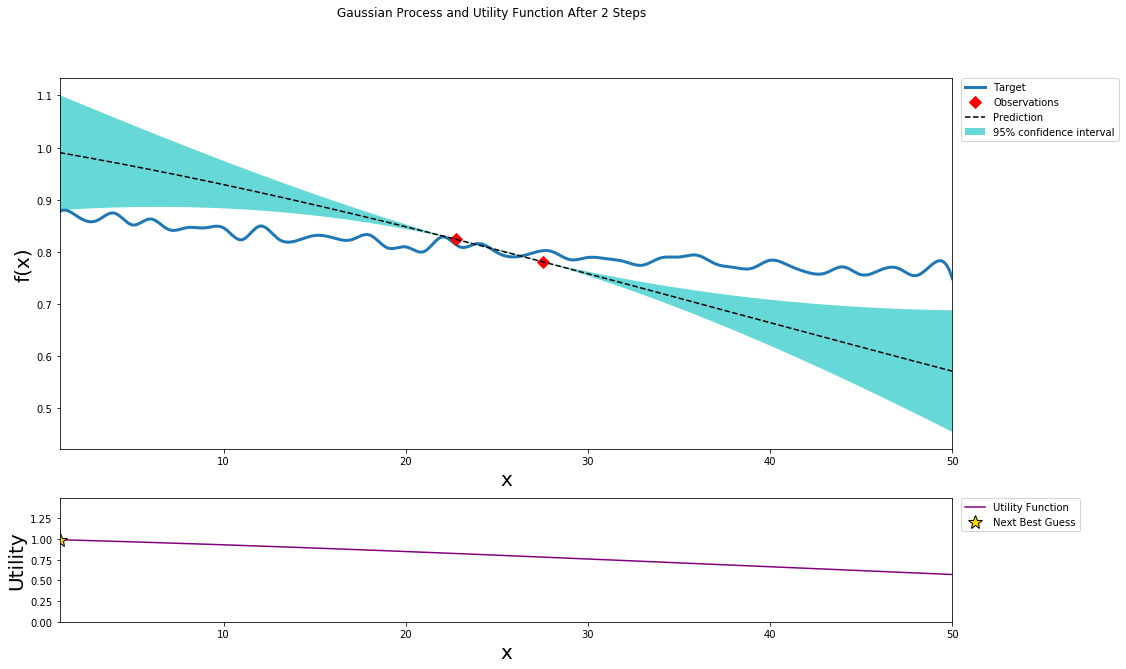

In [89]:
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
    3 | 00m58s |    0.87621 |    1.0000 | 


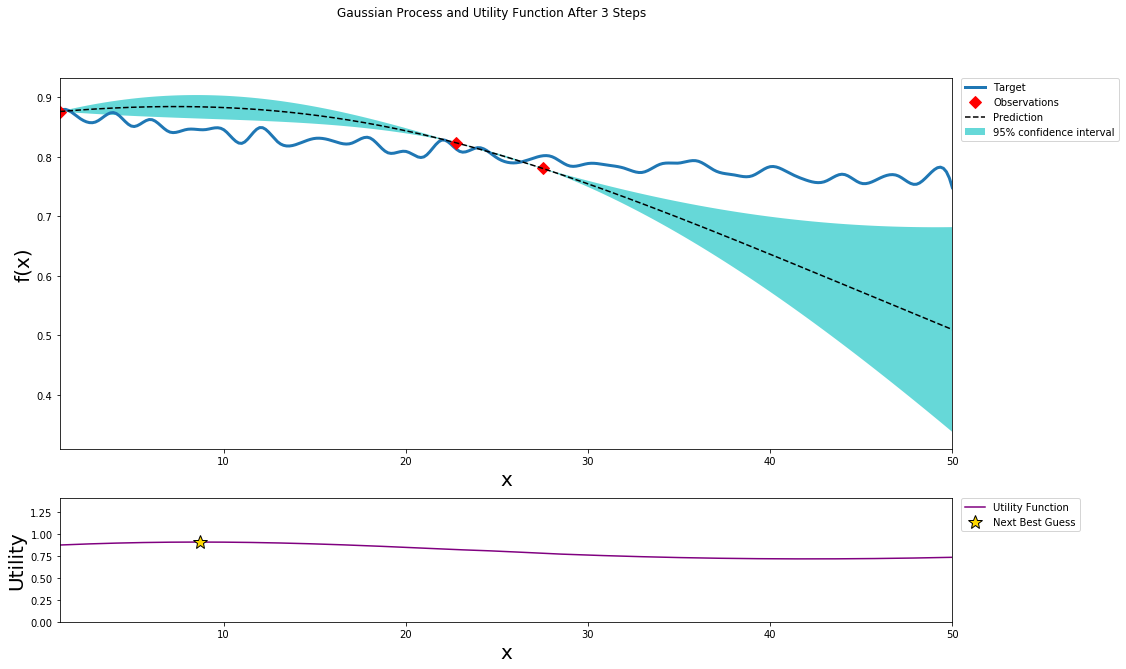

In [90]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
    4 | 00m56s |    0.86035 |    8.6451 | 


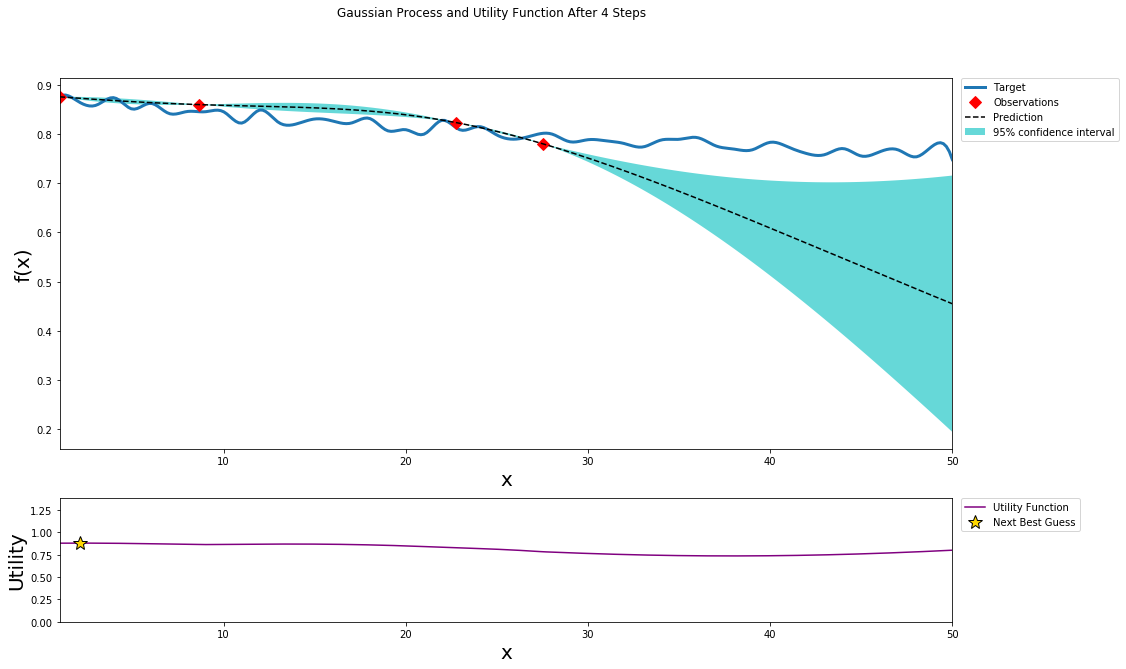

In [91]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
    5 | 00m56s |    0.87609 |    2.1265 | 


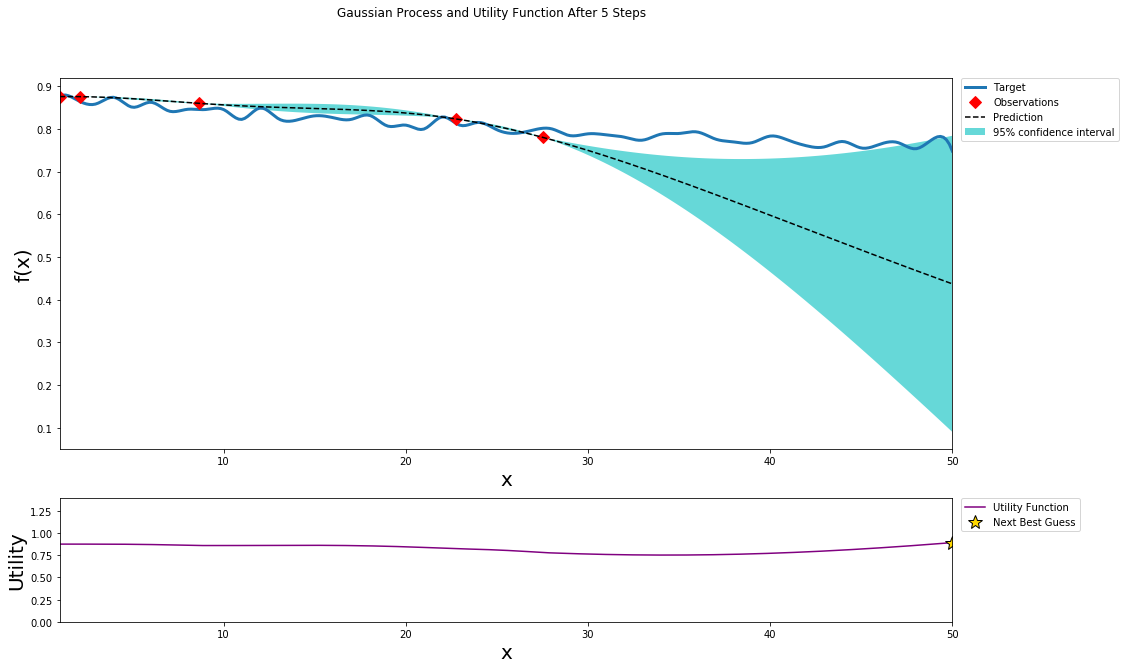

In [92]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
    6 | 00m53s |    0.76161 |   50.0000 | 


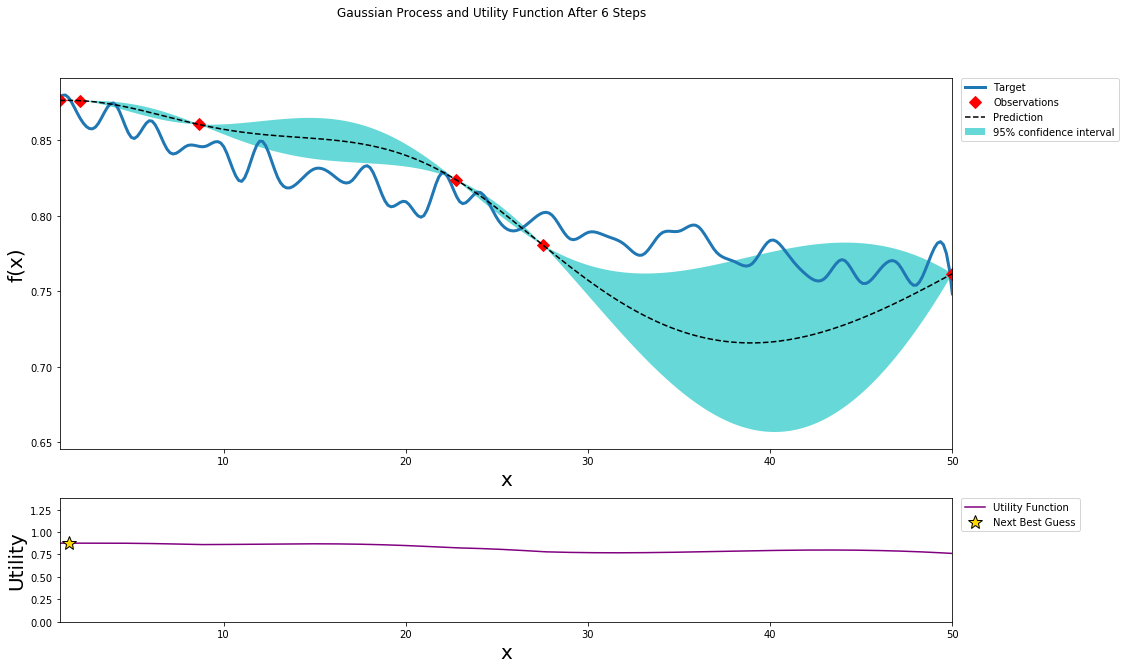

In [93]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
    7 | 00m55s |    0.87459 |    1.5047 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


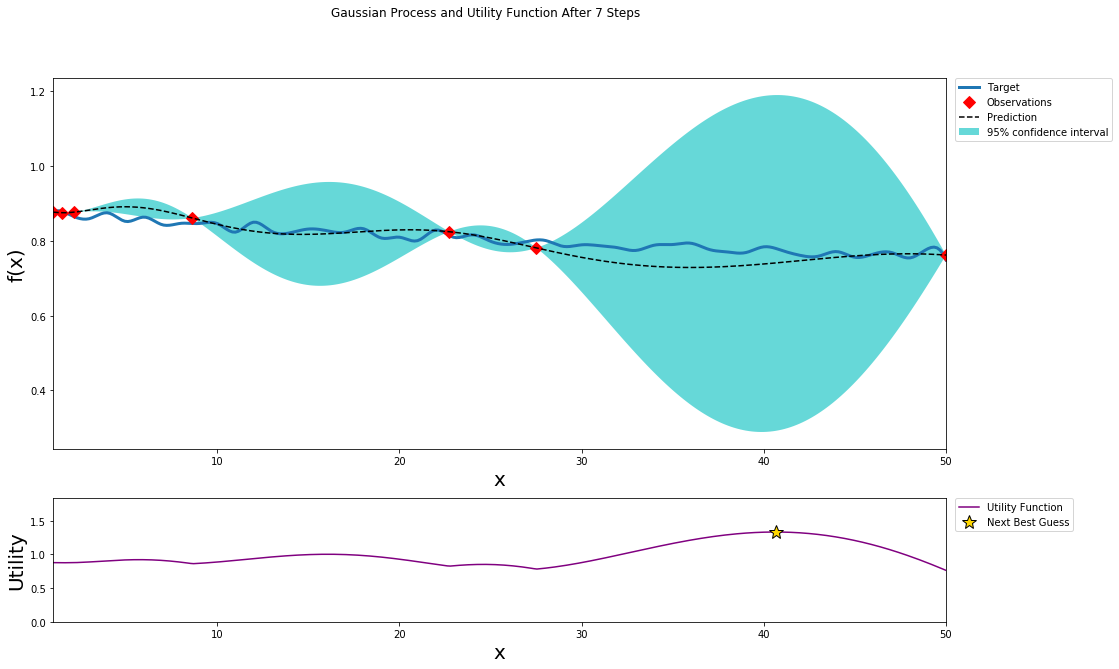

In [94]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
    8 | 01m01s |    0.77155 |   40.6289 | 


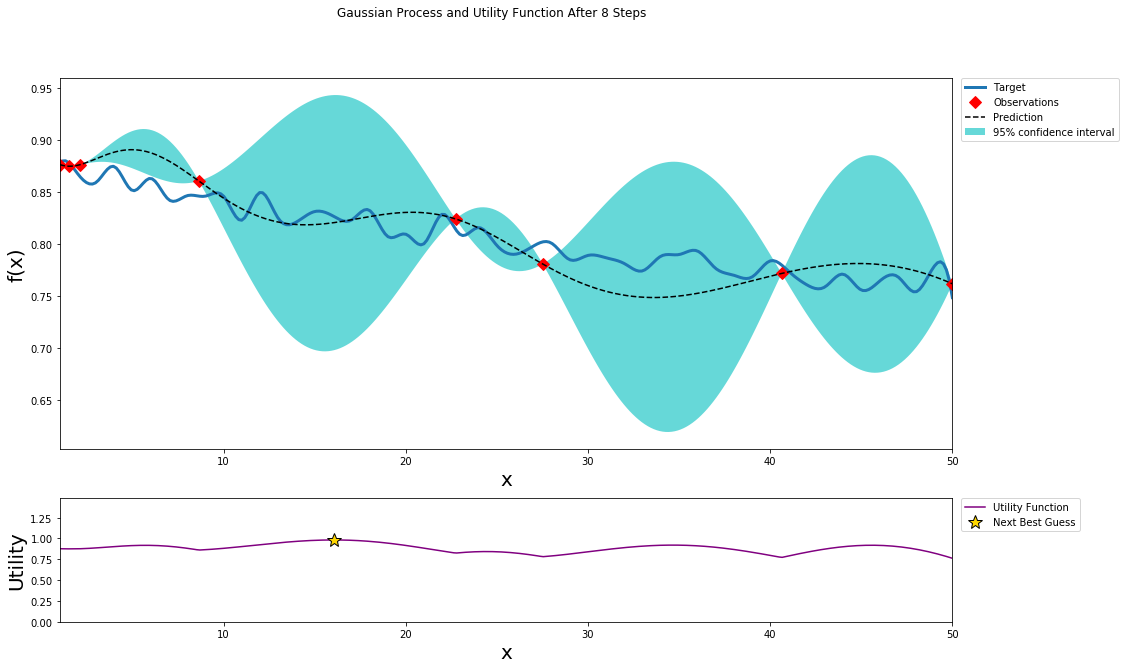

In [95]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
    9 | 01m03s |    0.81351 |   16.0534 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.18562821e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


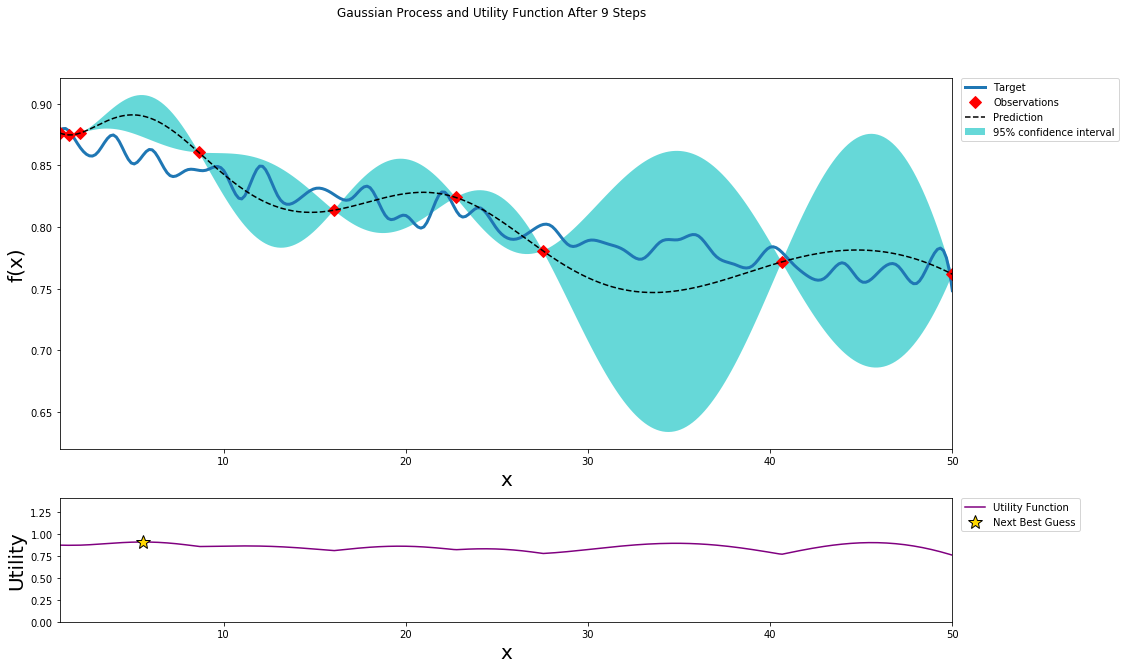

In [96]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
   10 | 01m03s |    0.84983 |    5.5803 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.10640955e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.14189043e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.28604313e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


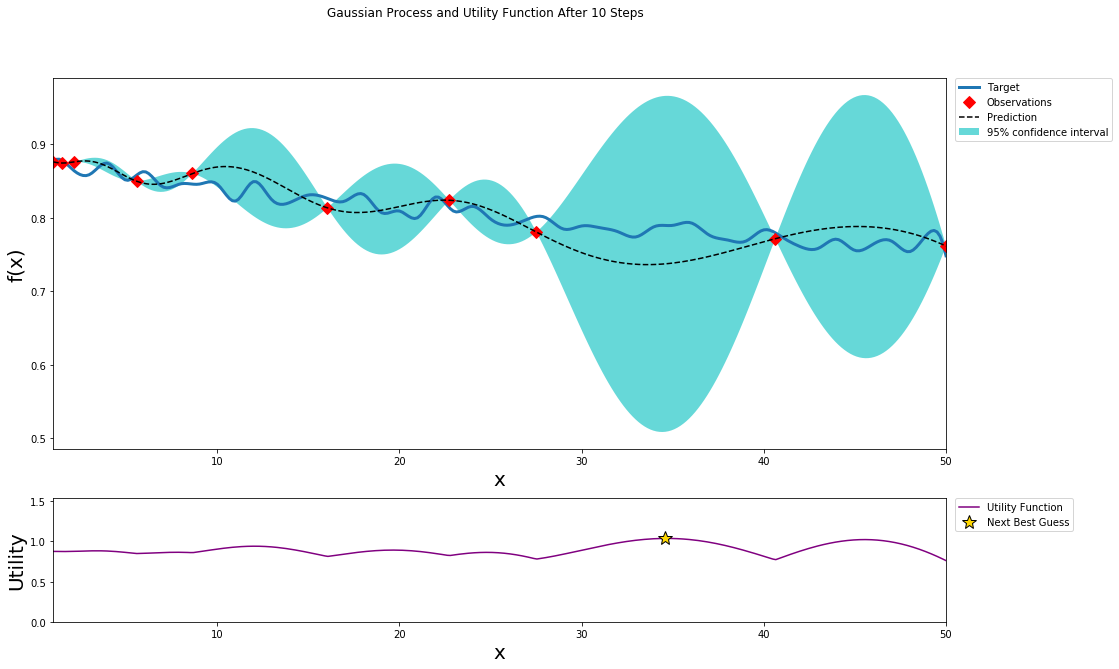

In [97]:
bo.maximize(init_points=0,n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00011817]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
   11 | 01m06s |    0.78686 |   34.6572 | 


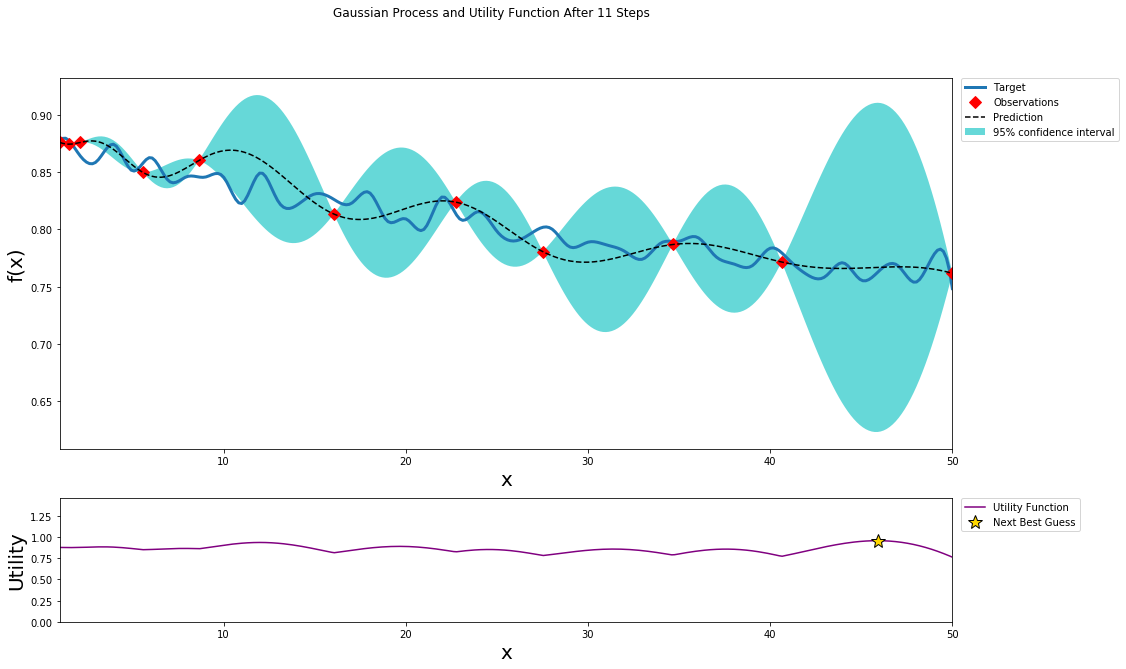

In [98]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
   12 | 01m06s |    0.78529 |   45.8876 | 


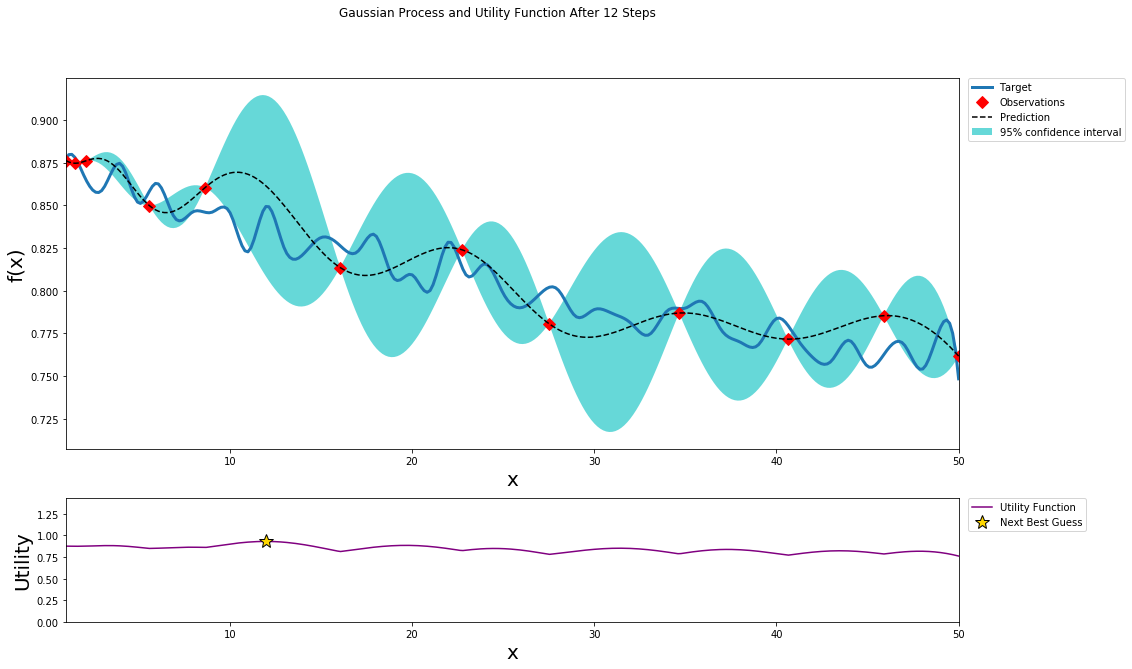

In [99]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
   13 | 01m05s |    0.82577 |   11.9670 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([3.84242958e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


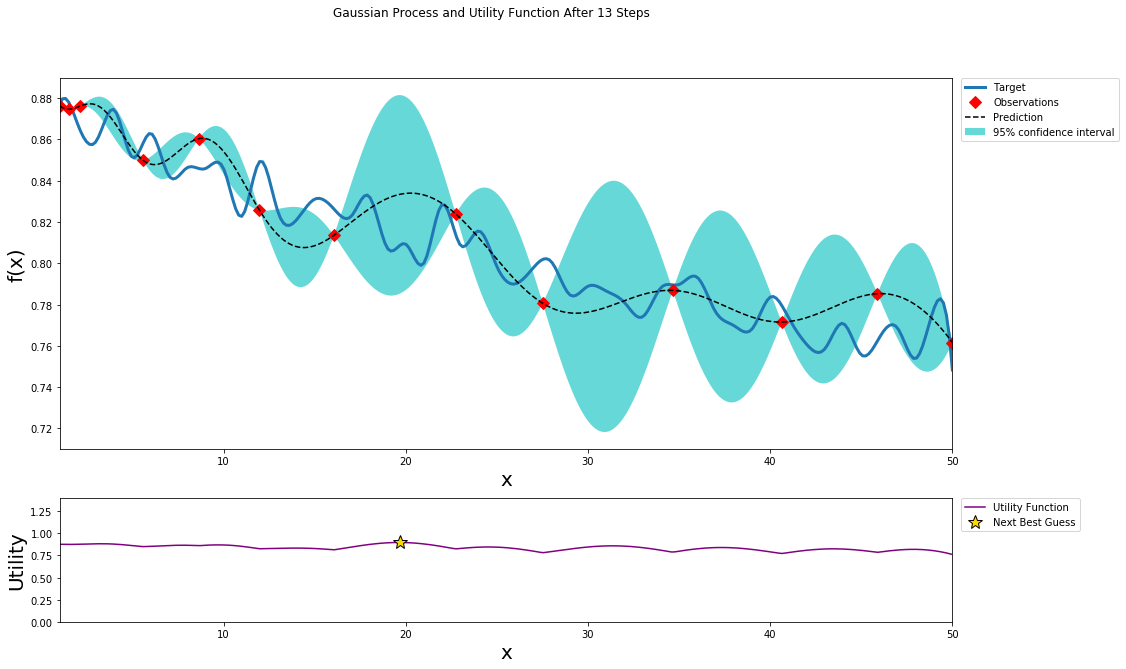

In [100]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
   14 | 01m03s |    0.82172 |   19.6279 | 


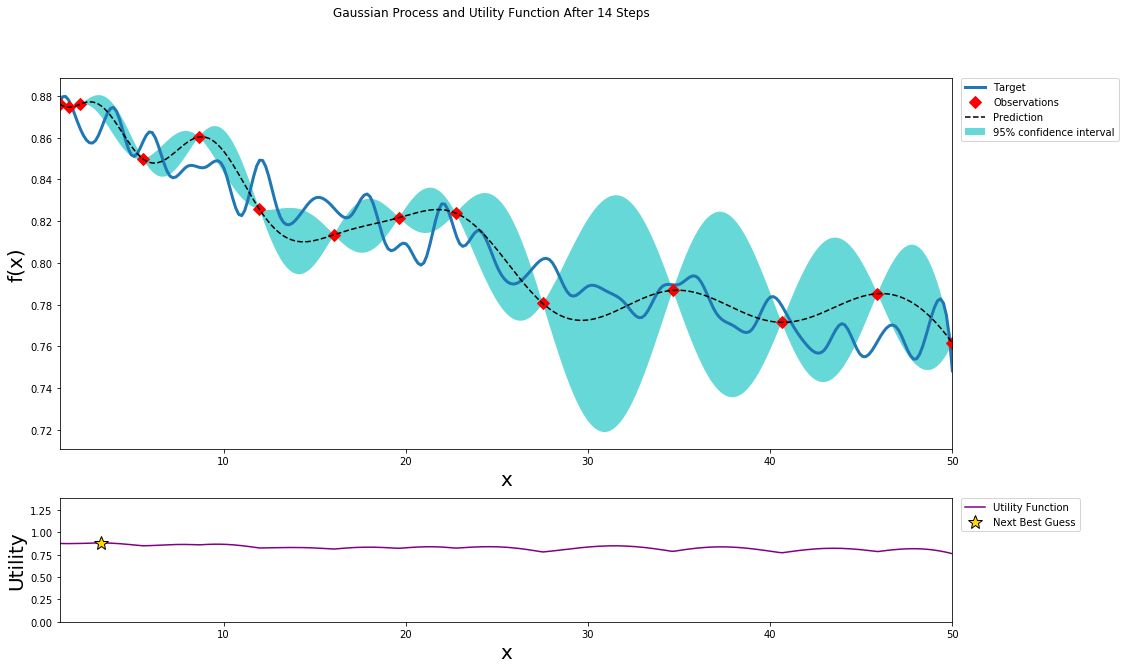

In [101]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
   15 | 01m07s |    0.86470 |    3.2623 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


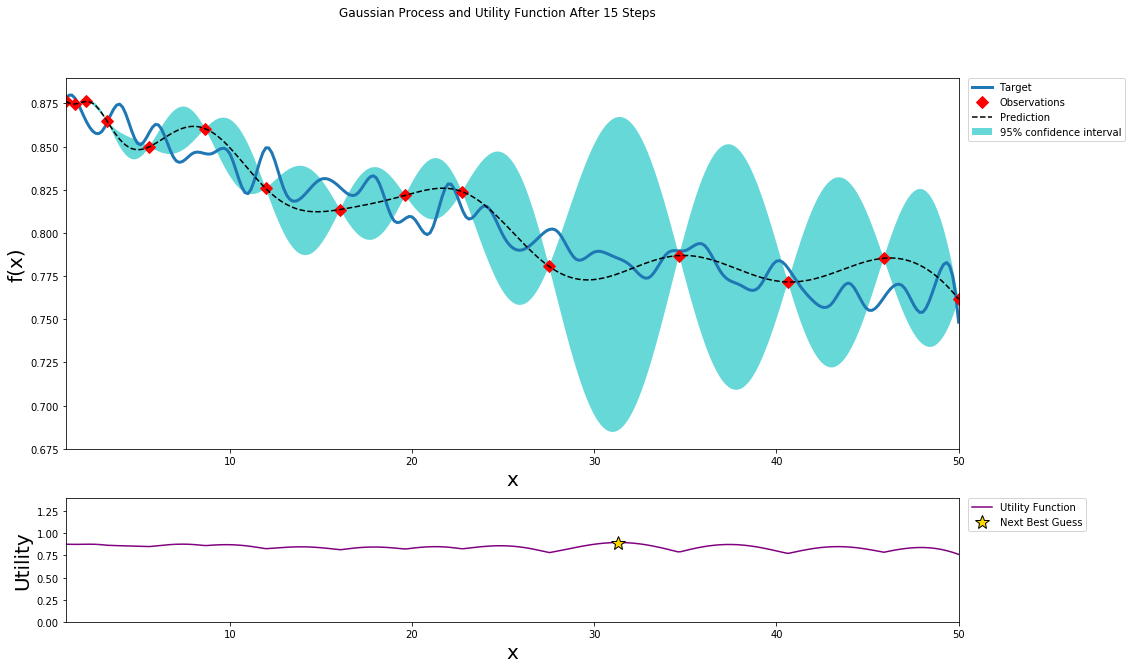

In [102]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
   16 | 01m00s |    0.79248 |   31.3421 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.14332406e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


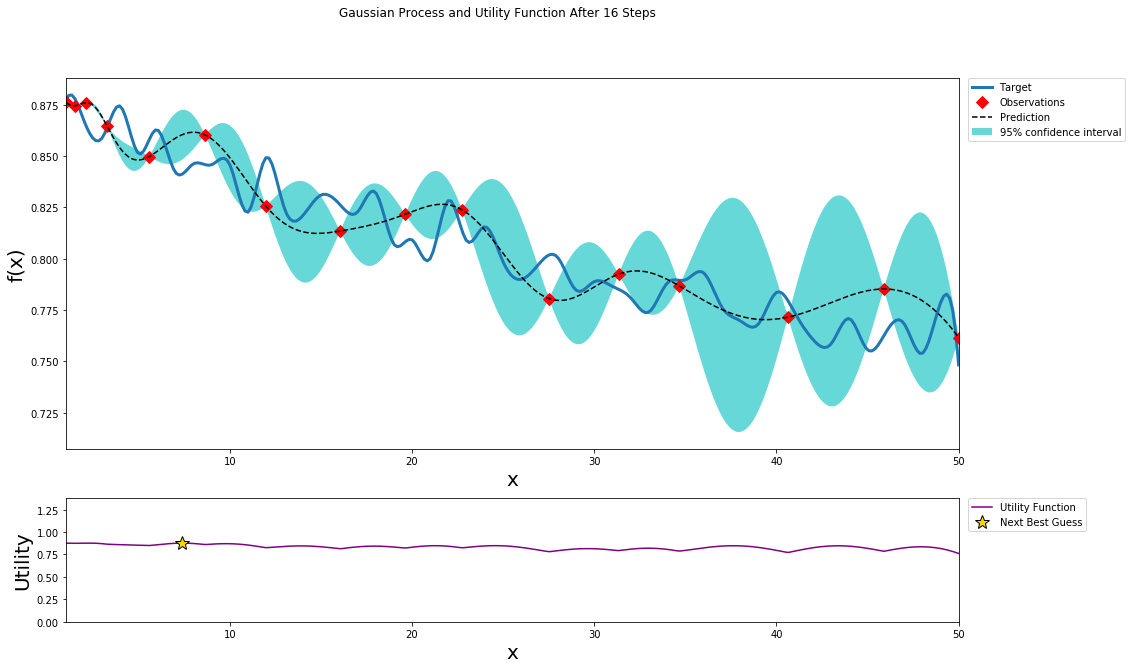

In [103]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         k | 
   17 | 00m55s |    0.85706 |    7.4052 | 


/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.59966439e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.33911963e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/rahuls/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00055955]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


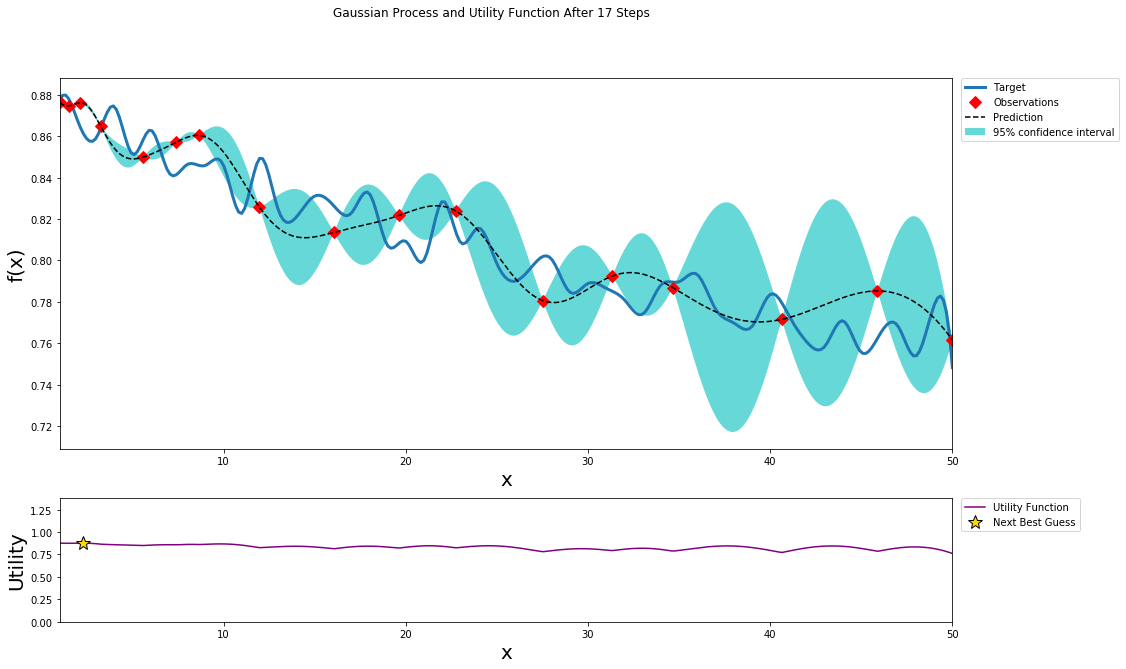

In [104]:
bo.maximize(init_points=0, n_iter=1)
plot_gp(bo, x_smooth, y_smooth)

In [105]:
print(bo.res['max'])

{'max_val': 0.8762057877813505, 'max_params': {'k': 1.0000000000000036}}
